<a href="https://colab.research.google.com/github/atharvas21/Stock-Market-Analysis/blob/master/PBLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 6.7MB/s 
     |████████████████████████████████| 296kB 19.1MB/s 
     |████████████████████████████████| 143kB 19.7MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=b2e4102fdfb5e1bce27c7e4ec65b2311a7576e1bac74ef3e394fe98c9b1edd09
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [ ]:
import pandas as pd

In [ ]:
from alpha_vantage.timeseries import TimeSeries

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import time

In [ ]:
api_key='4WD4N4EACWW6W027'

In [ ]:
ts = TimeSeries(key=api_key, output_format='pandas')

In [ ]:
data, meta_data=ts.get_intraday(symbol='MSFT',interval='1min',outputsize='full')

In [ ]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-02-19 20:00:00,240.68,240.68,240.68,240.68,383.0
2021-02-19 19:59:00,240.61,240.61,240.61,240.61,531.0
2021-02-19 19:58:00,240.61,240.61,240.61,240.61,406.0
2021-02-19 19:52:00,240.78,240.78,240.78,240.78,315.0
2021-02-19 19:42:00,240.60,240.60,240.60,240.60,170.0


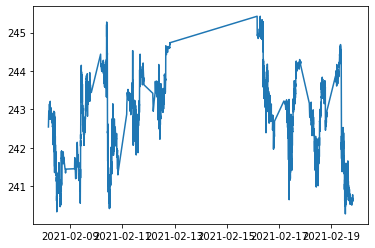

In [ ]:
plt.plot(data['4. close'])

In [ ]:
columns=['1. open',	'2. high',	'3. low',	'4. close',	'5. volume']
data.columns = columns

In [ ]:
data['TradeDate']=data.index.date
data['time']=data.index.time

In [ ]:
data.loc['2021-02-19']

,1. open,2. high,3. low,4. close,5. volume,TradeDate,time
date,,,,,,,
2021-02-19 20:00:00,240.68,240.68,240.68,240.68,383.0,2021-02-19,20:00:00
2021-02-19 19:59:00,240.61,240.61,240.61,240.61,531.0,2021-02-19,19:59:00
2021-02-19 19:58:00,240.61,240.61,240.61,240.61,406.0,2021-02-19,19:58:00
2021-02-19 19:52:00,240.78,240.78,240.78,240.78,315.0,2021-02-19,19:52:00
2021-02-19 19:42:00,240.60,240.60,240.60,240.60,170.0,2021-02-19,19:42:00
...,...,...,...,...,...,...,...
2021-02-19 04:35:00,243.97,243.97,243.97,243.97,445.0,2021-02-19,04:35:00
2021-02-19 04:21:00,243.88,243.88,243.88,243.88,122.0,2021-02-19,04:21:00
2021-02-19 04:20:00,243.86,243.86,243.86,243.86,200.0,2021-02-19,04:20:00


In [ ]:
market = data.between_time('19:00:00','20:00:00').copy()

In [ ]:
market.sort_index(inplace=True)

In [ ]:
market.groupby('TradeDate').agg({'3. low':min, '2. high':max})

,3. low,2. high
TradeDate,,
2021-02-08,241.3465,241.4663
2021-02-09,243.4417,243.4916
2021-02-10,241.2967,241.9851
2021-02-11,243.6412,244.2100
2021-02-12,244.5991,244.7388
2021-02-16,241.9651,242.6935
2021-02-17,244.1500,244.3000
2021-02-18,242.5500,242.9400
2021-02-19,240.5000,240.7800


In [ ]:
market.loc[market.groupby('TradeDate')['3. low'].idxmin()]

,1. open,2. high,3. low,4. close,5. volume,TradeDate,time
date,,,,,,,
2021-02-08 19:46:00,241.3465,241.3465,241.3465,241.3465,108.0,2021-02-08,19:46:00
2021-02-09 19:29:00,243.4417,243.4417,243.4417,243.4417,100.0,2021-02-09,19:29:00
2021-02-10 19:56:00,241.3166,241.3166,241.2967,241.2967,1732.0,2021-02-10,19:56:00
2021-02-11 19:59:00,243.6412,243.6412,243.6412,243.6412,399.0,2021-02-11,19:59:00
2021-02-12 19:10:00,244.5991,244.6290,244.5991,244.6290,300.0,2021-02-12,19:10:00
2021-02-16 19:05:00,242.4440,242.4440,241.9651,241.9651,2888.0,2021-02-16,19:05:00
2021-02-17 19:36:00,244.1500,244.1500,244.1500,244.1500,300.0,2021-02-17,19:36:00
2021-02-18 19:07:00,242.7400,242.7400,242.5500,242.5500,1000.0,2021-02-18,19:07:00
2021-02-19 19:06:00,240.5000,240.5100,240.5000,240.5100,611.0,2021-02-19,19:06:00


In [ ]:
market.loc[market.groupby('TradeDate')['2. high'].idxmax()]

,1. open,2. high,3. low,4. close,5. volume,TradeDate,time
date,,,,,,,
2021-02-08 19:15:00,241.4663,241.4663,241.4663,241.4663,535.0,2021-02-08,19:15:00
2021-02-09 19:12:00,243.4916,243.4916,243.4916,243.4916,204.0,2021-02-09,19:12:00
2021-02-10 19:08:00,241.9851,241.9851,241.8155,241.8155,1324.0,2021-02-10,19:08:00
2021-02-11 19:08:00,244.2000,244.2100,244.2000,244.2100,999.0,2021-02-11,19:08:00
2021-02-12 19:43:00,244.7388,244.7388,244.7288,244.7288,1985.0,2021-02-12,19:43:00
2021-02-16 20:00:00,242.4540,242.6935,242.4540,242.6935,439.0,2021-02-16,20:00:00
2021-02-17 19:09:00,244.2800,244.3000,244.2800,244.3000,512.0,2021-02-17,19:09:00
2021-02-18 19:51:00,242.9400,242.9400,242.9400,242.9400,145.0,2021-02-18,19:51:00
2021-02-19 19:52:00,240.7800,240.7800,240.7800,240.7800,315.0,2021-02-19,19:52:00


In [ ]:
print(data)

                     1. open   2. high  3. low  4. close  5. volume
date                                                               
2021-02-19 20:00:00   129.74  129.7500  129.72    129.72     7491.0
2021-02-19 19:59:00   129.72  129.7401  129.72    129.74     1478.0
2021-02-19 19:58:00   129.75  129.7500  129.70    129.74     3255.0
2021-02-19 19:57:00   129.69  129.7000  129.69    129.70     1117.0
2021-02-19 19:56:00   129.70  129.7000  129.66    129.69     1574.0
...                      ...       ...     ...       ...        ...
2021-02-08 04:05:00   136.53  136.6200  136.53    136.62     1533.0
2021-02-08 04:04:00   136.69  136.7900  136.69    136.79     2570.0
2021-02-08 04:03:00   136.63  136.8000  136.50    136.80     4741.0
2021-02-08 04:02:00   136.72  136.7200  136.66    136.70     2083.0
2021-02-08 04:01:00   136.68  136.8000  136.65    136.80    34441.0

[7618 rows x 5 columns]


In [ ]:
i=1
while i==1:
  data, meta_data=ts.get_intraday(symbol='stock_name',interval='1min',outputsize='full')
  data.to_excel("output.xlsx")
  time.sleep(60)

KeyboardInterrupt: ignored

In [ ]:
close_data = data['4. close']

In [ ]:
percentage_change = close_data.pct_change()

In [ ]:
print(percentage_change)

date
2021-02-19 20:00:00         NaN
2021-02-19 19:59:00    0.000154
2021-02-19 19:58:00    0.000000
2021-02-19 19:57:00   -0.000308
2021-02-19 19:56:00   -0.000077
                         ...   
2021-02-08 04:05:00   -0.000731
2021-02-08 04:04:00    0.001244
2021-02-08 04:03:00    0.000073
2021-02-08 04:02:00   -0.000731
2021-02-08 04:01:00    0.000732
Name: 4. close, Length: 7618, dtype: float64


In [ ]:
last_change = percentage_change[-1]

In [ ]:
if abs(last_change) > 0.0004: 
  print("stock_name Alert:",last_change)

AAPL Alert: 0.00073152889539152
